# Comparison of models, plotting

In [1]:
from simulating import one_of_simulating, get_all_repeated_simu_results

from scipy.stats import ttest_rel
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

my_palette = sns.color_palette(['gray', '#FF5722', '#FFC107'])  # gray, heard of, read about, 配色方案

## Total losses estimated by different datasets.

In [2]:
# 重复100次，100年模拟，指数人口增长，增长速率0.03
df = get_all_repeated_simu_results(years=100, times=100, how='exp', k=0.03)
df.head()

,m,u,v,loss_iudm,loss_osm,u+v,used dataset
0,0.021029,0.018206,0.008682,0.065828,0.079697,0.026887,all
1,0.019708,0.017321,0.008277,0.059362,0.070689,0.025598,all
2,0.019822,0.017444,0.008348,0.057160,0.067648,0.025793,all
3,0.020788,0.018161,0.008671,0.063694,0.076834,0.026832,all
4,0.020334,0.017673,0.008417,0.066087,0.080999,0.026091,all


In [3]:
piv = df.pivot_table(index='used dataset', values=['loss_iudm', 'loss_osm'], aggfunc=np.mean)
piv

,loss_iudm,loss_osm
used dataset,,
all,0.058593,0.070399
farm,0.067114,0.073685
off-farm,0.053750,0.067992


In [4]:
# 计算显著性
datasets = {}
for dataset in ['all', 'farm', 'off-farm']:
    for model in ['loss_osm', 'loss_iudm']:
        datasets[dataset + "_" + model.split('_')[-1]] = df[df['used dataset'] == dataset][model]
names = datasets.keys()

p_value_df = pd.DataFrame(index=datasets.keys(), columns=datasets.keys())
for i, name in enumerate(names):
    for j, name2 in enumerate(names):
        if j == i: continue
        else:
            p_value = ttest_rel(datasets[name], datasets[name2])[1]
            p_value_df.loc[name, name2] = p_value
            
p_value_df

,all_osm,all_iudm,farm_osm,farm_iudm,off-farm_osm,off-farm_iudm
all_osm,NaN,1.84941e-78,2.20129e-73,1.74141e-73,8.15042e-74,1.81479e-79
all_iudm,1.84941e-78,NaN,8.47505e-78,8.25362e-79,1.35314e-78,3.28636e-81
farm_osm,2.20129e-73,8.47505e-78,NaN,4.25641e-76,1.3908e-73,1.03345e-78
farm_iudm,1.74141e-73,8.25362e-79,4.25641e-76,NaN,2.24081e-37,1.0608e-79
off-farm_osm,8.15042e-74,1.35314e-78,1.3908e-73,2.24081e-37,NaN,5.70616e-80
off-farm_iudm,1.81479e-79,3.28636e-81,1.03345e-78,1.0608e-79,5.70616e-80,NaN


所有差异都是显著的

In [5]:
print("Farm compare with all")
(piv.loc['farm', :] - piv.loc['all', :])/piv.loc['all', :] * 100

print("\n Off-farm compare with all")
(piv.loc['off-farm', :] - piv.loc['all', :])/piv.loc['all', :] * 100

Farm compare with all


loss_iudm    14.541253
loss_osm      4.668259
dtype: float64


 Off-farm compare with all


loss_iudm   -8.266879
loss_osm    -3.418708
dtype: float64

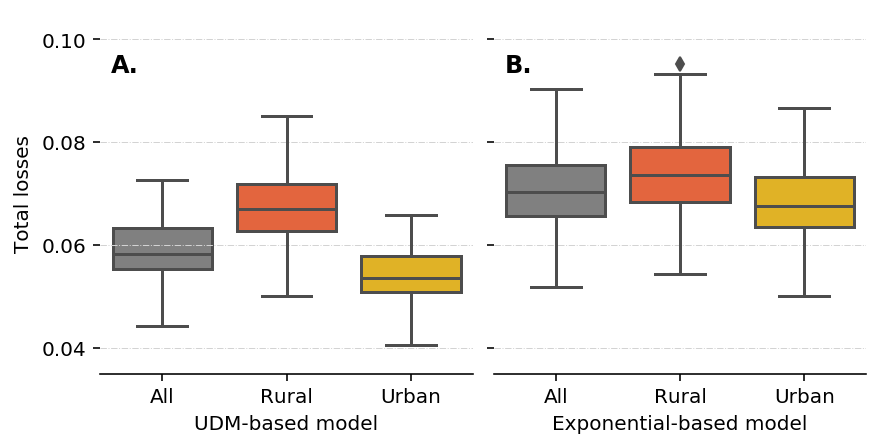

In [6]:
%config InlineBackend.figure_format ='retina'
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(6, 3), constrained_layout=True)

sns.boxplot(x='used dataset', y='loss_iudm', data=df, ax=ax1, palette=my_palette)
sns.boxplot(x='used dataset', y='loss_osm', data=df, ax=ax2, palette=my_palette)

for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(color='lightgray', linestyle='-.', linewidth=0.5)
    ax.set_ylim(0.035, 0.105)
    ax.set_yticks(np.arange(0.04, 0.11, 0.02))
    ax.set_xticklabels(['All', 'Rural', 'Urban'])
ax2.axes.yaxis.label.set_visible(False)
    
ax1.set_ylabel("Total losses")
ax1.set_xlabel("UDM-based model")
ax2.set_xlabel("Exponential-based model")

ax1.text(-0.3, 0.095, 'A.', ha='center', va='center', weight='bold', size='large')
ax2.text(-0.3, 0.095, 'B.', ha='center', va='center', weight='bold', size='large')
# 出图
plt.savefig('images/result3-1.jpg', format='jpg', dpi=300)
plt.show();

## One of simulating results

In [7]:
one_simu_result = one_of_simulating(years=100, k=0.03, kind='all', how='exp', random_state=1)

osm = one_simu_result['loss_osm'].mean()
iudm = one_simu_result['loss_iudm'].mean()
percentage = (osm - iudm) / osm

print("Total losses estimated by the OSM are {:.2%} exceding by IUDM.".format(percentage));

Used params in this simulation:
p = -0.470, r = 0.487, q = 1.000
miu_s = 0.016
k_osm = 0.030, k_iudm = 0.030
Ttest_relResult(statistic=5.186224893866695, pvalue=6.149537993688617e-06)
Total losses estimated by the OSM are 16.02% exceding by IUDM.


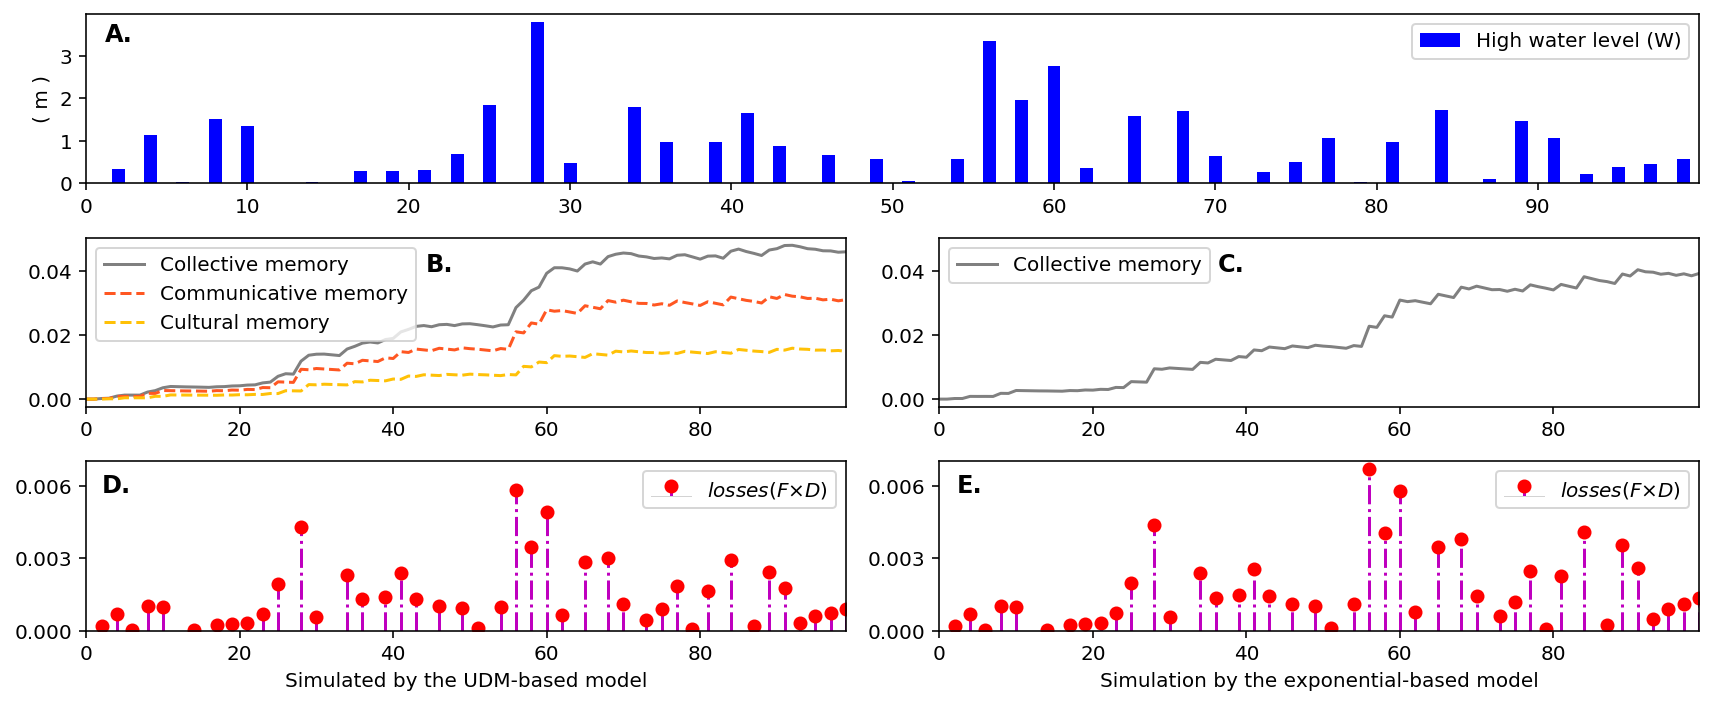

In [8]:
# 对比OSM和IUDM在一次模拟中的差异
%config InlineBackend.figure_format ='retina'

t_arr = one_simu_result['y'].values
w, h, loss_osm, loss_iudm, u, v, m = [one_simu_result[col].values for col in ['w', 'h', 'loss_osm', 'loss_iudm', 'u', 'v', 'm']]

fig = plt.figure(figsize=(12, 5), tight_layout=True)

ax1 = fig.add_subplot(311)
ax1.bar(t_arr, w, color="b", label="High water level (W)")
# ax1.plot(t_arr, h, "--", color="k", label="Height of levee (H)")
ax1.set_xlim(t_arr.min(), t_arr.max()+1)
ax1.set_xticks(np.arange(t_arr.min(), t_arr.max()+1, 10))
plt.ylabel("( m )")
plt.legend(loc=1)

# ['#FFC107', '#FF5722', '#00A0E8']  # read, heard, experienced
ax2 = fig.add_subplot(323)
ax2.plot(t_arr, u+v, "-", label="Collective memory", color='gray')
ax2.plot(t_arr, u, "--", label="Communicative memory", color='#FF5722')
ax2.plot(t_arr, v, "--", label="Cultural memory", color='#FFC107')
ax2.set_xlim(t_arr.min(), t_arr.max())
ax2.legend()

ax3 = fig.add_subplot(324)
ax3.plot(t_arr, m, "-", label="Collective memory", color='gray')
ax3.set_ylim(ax2.get_ylim())
ax3.set_xlim(t_arr.min(), t_arr.max())
ax3.legend()

ax4 = fig.add_subplot(325)
markerline, stemlines, baseline = ax4.stem(t_arr, loss_iudm, linefmt="-.", markerfmt="o", label="$losses(F × D)$",
                                           use_line_collection=True)
plt.setp(baseline, color="lightgray", linewidth=0.5)
plt.setp(markerline, color="r")
plt.setp(stemlines, color="m")
ax4.legend(loc=1)
ax4.set_xlim(t_arr.min(), t_arr.max())
ax4.set_xlabel("Simulated by the UDM-based model")
ax4.set_ylim(0, 0.007)
ax4.set_yticks(np.arange(0., 0.007, 0.003))

# OSM 的图
ax5 = fig.add_subplot(326)
markerline, stemlines, baseline = ax5.stem(t_arr, loss_osm, linefmt="-.", markerfmt="o",
                                           use_line_collection=True, label="$losses(F × D)$")
plt.setp(baseline, color="lightgray", linewidth=0.5)
plt.setp(markerline, color="r")
plt.setp(stemlines, color="m")
ax5.set_xlim(t_arr.min(), t_arr.max())
ax5.set_xlabel("Simulation by the exponential-based model")
ax5.set_ylim(ax4.get_ylim())
ax5.set_yticks(ax4.get_yticks())
ax5.legend(loc=1)

# 加标签
ax1.text(2, 3.5, 'A.', ha='center', va='center', weight='bold', size='large')
ax2.text(46, 0.042, 'B.', ha='center', va='center', weight='bold', size='large')
ax3.text(38, 0.042, 'C.', ha='center', va='center', weight='bold', size='large')
ax4.text(4, 0.006, 'D.', ha='center', va='center', weight='bold', size='large')
ax5.text(4, 0.006, 'E.', ha='center', va='center', weight='bold', size='large')

# 出图
plt.savefig('images/result3-2.jpg', format='jpg', dpi=300)
plt.show();

## One of simulating, by different datasets

In [9]:
rural_simulating = one_of_simulating(years=100, k=0.03, kind='farm', how='exp', random_state=1).fillna(0.)
urban_simulating = one_of_simulating(years=100, k=0.03, kind='off-farm', how='exp', random_state=1).fillna(0.)

Used params in this simulation:
p = -0.470, r = 0.487, q = 1.000
miu_s = 0.016
k_osm = 0.030, k_iudm = 0.030
Ttest_relResult(statistic=5.043058521813402, pvalue=9.764183994088205e-06)
Used params in this simulation:
p = -0.470, r = 0.487, q = 1.000
miu_s = 0.016
k_osm = 0.030, k_iudm = 0.030
Ttest_relResult(statistic=5.224355999369112, pvalue=5.435248599184477e-06)


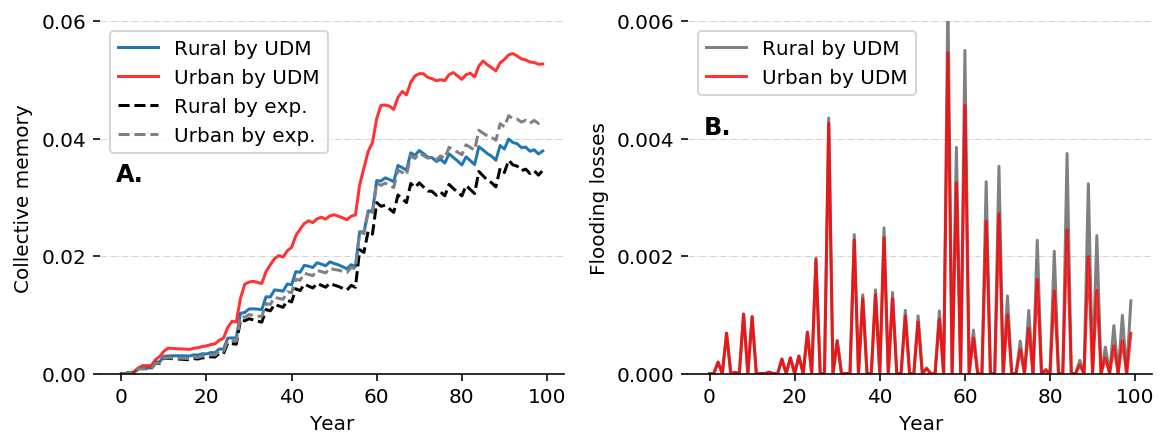

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
rural_simulating['u+v'].plot(ax=ax1, label='Rural by UDM')
urban_simulating['u+v'].plot(ax=ax1, color='red', alpha=0.8, label='Urban by UDM')
rural_simulating['m'].plot(ax=ax1, ls='--', color='black', label='Rural by exp.')
urban_simulating['m'].plot(ax=ax1, ls='--', color='gray', label='Urban by exp.')
ax1.legend(loc=2)
ax1.set_ylabel("Collective memory")
ax1.set_yticks(np.arange(0., 0.061, 0.02))
ax1.set_ylim(0., 0.06)

rural_simulating['loss_iudm'].plot(ax=ax2, color='gray', label='Rural by UDM')
urban_simulating['loss_iudm'].plot(ax=ax2, color='red', alpha=0.8, label='Urban by UDM')
ax2.legend(loc=2)
ax2.set_ylabel("Flooding losses")
ax2.set_yticks(np.arange(0., 0.0061, 0.002))
ax2.set_ylim(0., 0.006)

for ax in [ax1, ax2]:
    ax.set_xlabel("Year")
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(color='lightgray', linestyle='-.', linewidth=0.5)
    
# 标签
ax1.text(2, 0.034, 'A.', ha='center', va='center', weight='bold', size='large')
ax2.text(2, 0.0042, 'B.', ha='center', va='center', weight='bold', size='large')

# 出图
plt.savefig("images/result_3-3.jpg", dpi=300)
plt.show();